<a href="https://colab.research.google.com/github/calvinb8/QTM250-example/blob/main/project4/HW4_Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Are sarcastic and ironic tweets considered positive or negative language according to NLP?
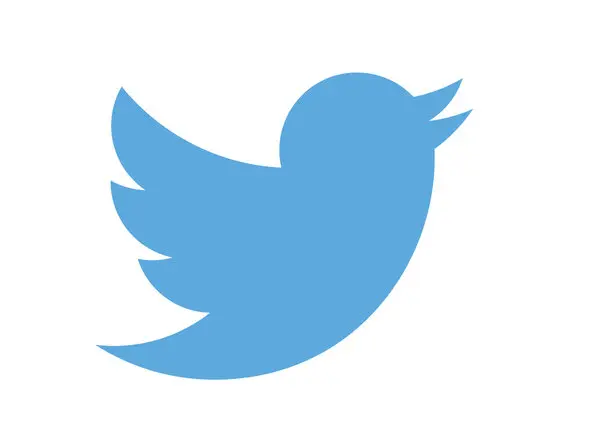

By: Calvin Brauer, Grace Engel, Jessica Forsstrom, and Maggie Davis
##Introduction
Our group wanted to utilize the Natural Language Processing API in order to perform sentiment analysis. Sentiment analysis is an exciting tool that determines if a sentence or phrase is considered generally positive or negative. It runs from a score of -1.0 indicating a negative statement to a positive 1.0. While sentiment analysis works well on phrases with key words like “sad” and other specific emotion related words, we wanted to see what kind of sentiment it would pick up on with sentences that were ironic or sarcastic. 
We found a set of curated tweets that contain hashtags indicating a tweet as sarcastic or ironic and performed a sentiment analysis on the tweets with the google cloud NLP API. Our team hypothesized that most tweets would recieve nuetral or negative scores, with the majority somewhere in the middle. We predicted this would be the case due to the social and behavioral knowledge needed to truly identify the sentiment underlying irony and sarcasm, which the API does not possess. 


## Data 

Here is our csv that we generated: https://github.com/calvinb8/QTM250-example/blob/main/project4/results.csv

## Methods

### Architecture diagram

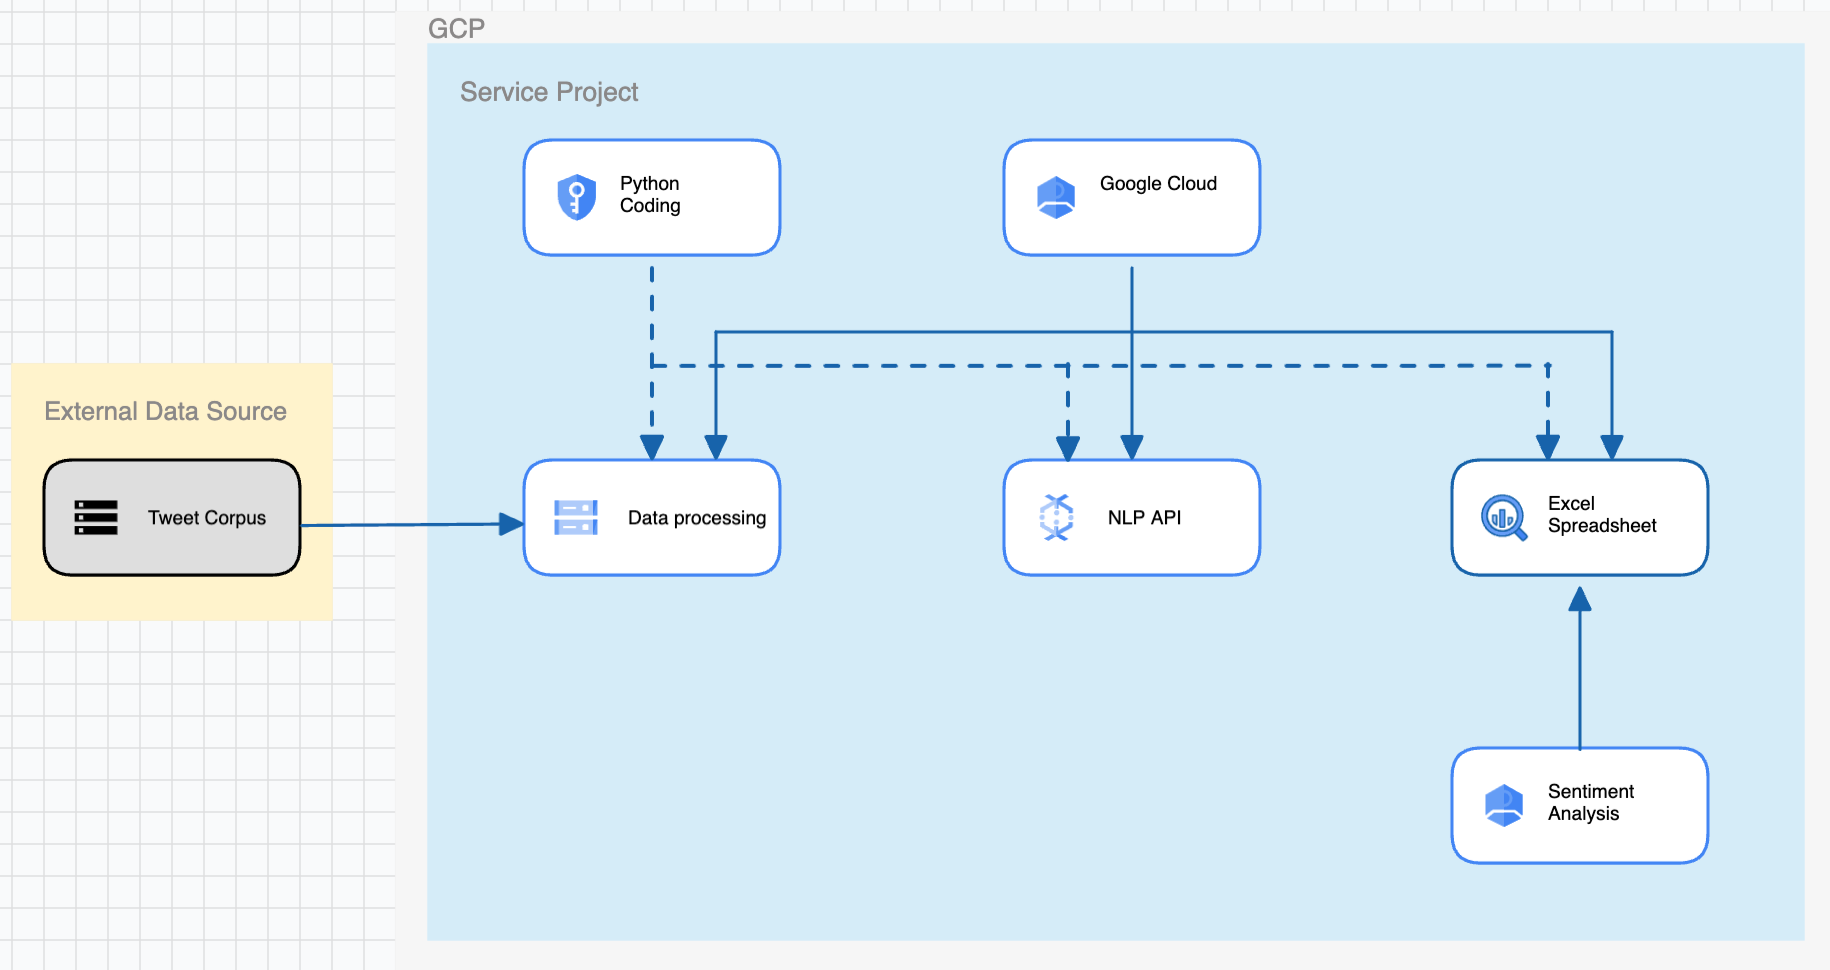

We used API calls to the NLP API using a code snippet from Google, then used the pandas library to complile and clean the data. Lastly, we exported the data into a csv file.

This cell block below comes from [SOURCE](https://cloud.google.com/natural-language/docs/analyzing-sentiment)

In [ ]:
# -*- coding: utf-8 -*-
#
# Copyright 2018 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# DO NOT EDIT! This is a generated sample ("Request",  "analyze_sentiment")

# To install the latest published package dependency, execute the following:
#   pip install google-cloud-language

from google.cloud import language_v1
import six

import pandas as pd
import numpy as np

def sample_analyze_sentiment(content):

    client = language_v1.LanguageServiceClient()

    # content = 'Your text to analyze, e.g. Hello, world!'

    if isinstance(content, six.binary_type):
        content = content.decode("utf-8")

    type_ = language_v1.Document.Type.PLAIN_TEXT
    document = {"type_": type_, "content": content}

    response = client.analyze_sentiment(request={"document": document})
    sentiment = response.document_sentiment
    return sentiment.score

PermissionDenied: ignored

In [ ]:
def main():
    df = pd.read_csv('test.csv').iloc[0:200]
    results = pd.DataFrame({'phrase': df['tweets'], 'sentiment': df['class'], 'score':np.zeros(len(df['tweets']))})
    scores = []
    for row in df['tweets']:
        score = sample_analyze_sentiment(row)
        scores.append(score)
    results['score'] = np.array(scores)
    results.to_csv('results.csv')

main()

## Results
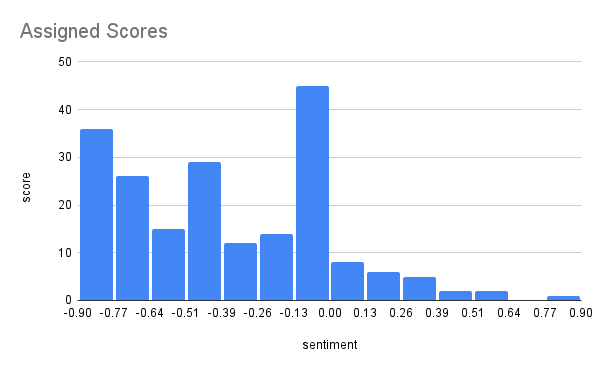

## Discussion and Conclusion

Though the Natural Language Processing API is historically successful at identifying obviously positive or negative statements that fall into more clearly associated categories, such as sad, angry, or happy, our team wondered about the scores that the API would assign to statements with a more ambiguous emotional context. Specifically, we wondered how the API would tag statements that are ironic or sarcastic, both of which can have positive or negative tones, but are not always clearly associated with either, or may be neutral. 

The majority of scores were below 0, representing a negative tone, with only 24 scores rated above 0. We found that 53 scores out of the 200 were between -0.13 and 0.13, and many of these were extremely close to 0, signalling neither a positive nor negative statement. This was somewhat unsurprising, as the nature of certain humor like sarcasm may, on the surface, not strongly indicate an emotional direction. The number of scores that could be considered strongly positive was extremely small, with only 3 statements rated over 0.51. This would be consistent with our expectations that sarcastic and ironic statements are generally more negatively toned. Meanwhile, 77 scores were below -0.51, showing a relatively or strongly negative score, suggesting that the API found most cases of sarcasm and irony to be negatively toned. Though this finding is promising, there were certainly cases within the data whose tone did not seem to be accurately represented by the score. One statement, for example, read "I just love getting anxiety at random times. Its fun! #sarcasm" recieved a score of 0.300, indicating a positive tone. A human assessment would contradict this, saying that the truth of the statement is that anxiety is, in fact, the opposite of fun and clearly negative. We conclude that although the surface results are promising, the team would need to conduct a thorough assessment of each statement, and maybe even give each statement our own scores, in order to truly assess the accuracy of the findings.   


There are lots of exciting possible uses for APIs like the Natural Language Processing API. One could be running analyses about social media posts to determine emotional tone, and flag posts that may be harmful to others. Though this could be helpful in identifying threats or minimizing online bullying, there are concerns over how APIs like this one can be utilized to control online narratives and manipulate social media algorithims. Further research should be completed about both the accuracy and the ethicality of APIs like this one being employed for these uses. 